# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pymongo import MongoClient

from teamspector.distance_correlation import distcorr

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_1.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

Best features by correlation to `ypct` and `top100`:

In [2]:
c = df[df.columns.drop(labels=['top100'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].iloc[1:].head(20))

ego_previous_votes_maximum           0.717443
ego_previous_votes_mean              0.710288
ego_previous_votes_median            0.710111
team_previous_votes                  0.689749
ego_previous_votes_minimum           0.581727
ego_previous_rating_std_dev          0.509749
team_closeness                       0.397392
team_size                            0.394717
ego_closeness_maximum                0.383244
ego_closeness_minimum                0.372639
ego_closeness_mean                   0.367281
ego_network_constraint_mean         -0.354916
ego_closeness_median                 0.349470
pair_shared_collaborators_maximum    0.336507
ego_network_constraint_median       -0.333982
pair_shared_collaborators_mean       0.330427
pair_shared_collaborators_minimum    0.325694
team_network_constraint             -0.323533
pair_shared_collaborators_median     0.318784
pair_neighbour_overlap_std_dev       0.318203
Name: ypct, dtype: float64


In [3]:
feat = list(df.columns)
feat.remove('top100')
feat.remove('ypct')

In [4]:
result = []
for x in feat:
    if 'previous' in x:
        filled = df[x].fillna(df[x].dropna().min())
    else:
        filled = df[x]
    c = stats.pointbiserialr(filled, df['top100'])
    result.append((c.correlation, c.pvalue, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f} (p-value: {:.4f})".format(x[2], x[0], x[1]))

ego_previous_rating_std_dev         0.3013 (p-value: 0.0000)
ego_previous_votes_median           0.2792 (p-value: 0.0000)
ego_previous_votes_mean             0.2790 (p-value: 0.0000)
team_previous_votes                 0.2698 (p-value: 0.0000)
ego_previous_rating_maximum         0.2690 (p-value: 0.0000)
ego_previous_votes_maximum          0.2674 (p-value: 0.0000)
ego_previous_rating_mean            0.2544 (p-value: 0.0000)
ego_previous_rating_median          0.2541 (p-value: 0.0000)
team_previous_rating                0.2534 (p-value: 0.0000)
ego_previous_rating_minimum         0.2424 (p-value: 0.0000)
ego_previous_votes_minimum          0.2402 (p-value: 0.0000)
team_closeness                      0.1925 (p-value: 0.0000)
ego_closeness_minimum               0.1828 (p-value: 0.0000)
ego_closeness_mean                  0.1821 (p-value: 0.0000)
ego_closeness_median                0.1807 (p-value: 0.0000)
ego_closeness_maximum               0.1802 (p-value: 0.0000)
team_size               

In [5]:
result = []
dfs = df.sample(n=800, random_state=1)
for x in feat:
    if 'previous' in x:
        filled = dfs[x].fillna(dfs[x].dropna().min())
    else:
        filled = dfs[x]
    c = distcorr(filled, dfs['ypct'], pval=False)
    result.append((c, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f}".format(x[1], x[0]))

ego_previous_votes_maximum          0.7274
ego_previous_votes_mean             0.7271
ego_previous_votes_median           0.7226
team_previous_votes                 0.7063
ego_previous_votes_minimum          0.6150
ego_previous_rating_maximum         0.4248
team_previous_rating                0.4162
ego_previous_rating_median          0.4160
ego_previous_rating_mean            0.4142
ego_previous_rating_minimum         0.4023
team_size                           0.3652
team_closeness                      0.3581
ego_closeness_maximum               0.3466
ego_network_constraint_mean         0.3460
ego_closeness_minimum               0.3392
ego_closeness_mean                  0.3341
ego_previous_rating_std_dev         0.3311
ego_network_constraint_maximum      0.3229
ego_network_constraint_median       0.3191
ego_closeness_median                0.3187


## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

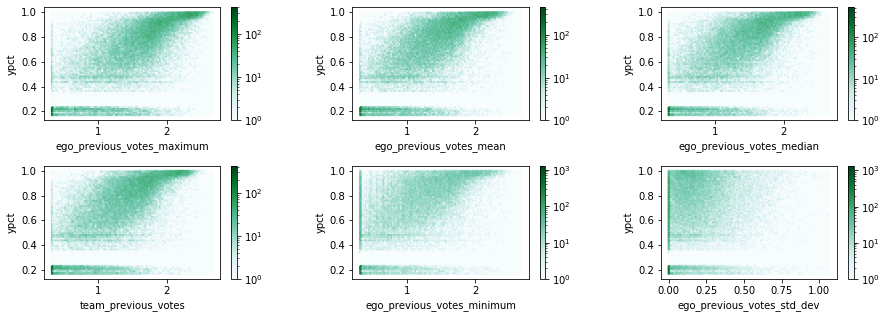

In [6]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

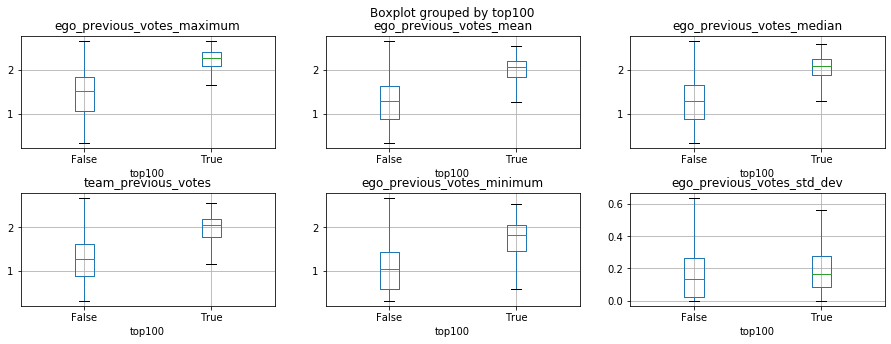

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])


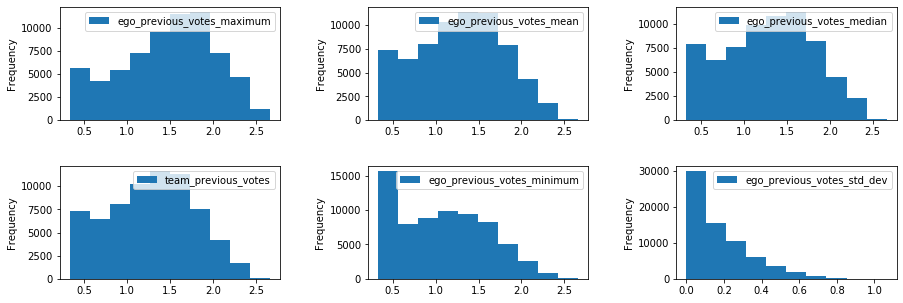

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [9]:
dfx[f].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev,ypct,year
ego_previous_votes_maximum,1.000000,0.937838,0.925511,0.911040,0.728780,0.381980,0.701102,0.221795
ego_previous_votes_mean,0.937838,1.000000,0.988964,0.962701,0.909540,0.054750,0.693758,0.220666
ego_previous_votes_median,0.925511,0.988964,1.000000,0.953928,0.874059,0.082692,0.692662,0.222198
team_previous_votes,0.911040,0.962701,0.953928,1.000000,0.864514,0.082198,0.675496,0.228463
ego_previous_votes_minimum,0.728780,0.909540,0.874059,0.864514,1.000000,-0.341829,0.567609,0.179128
ego_previous_votes_std_dev,0.381980,0.054750,0.082692,0.082198,-0.341829,1.000000,0.180043,0.061905
ypct,0.701102,0.693758,0.692662,0.675496,0.567609,0.180043,1.000000,0.121060
year,0.221795,0.220666,0.222198,0.228463,0.179128,0.061905,0.121060,1.000000


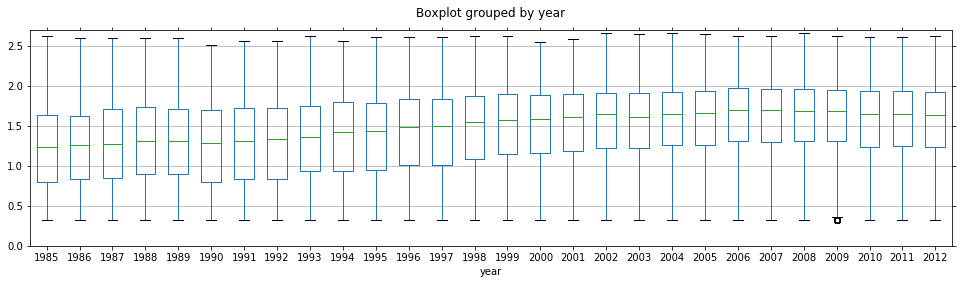

In [10]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

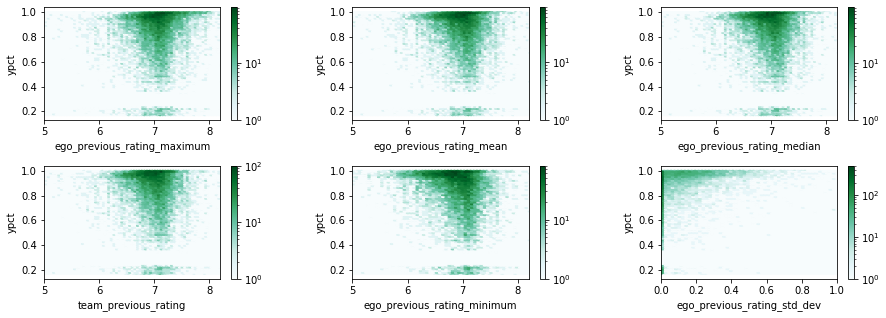

In [11]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    if i != 5:
        ax.set_xlim(5, 8.2)
    else:
        ax.set_xlim(0, 1)

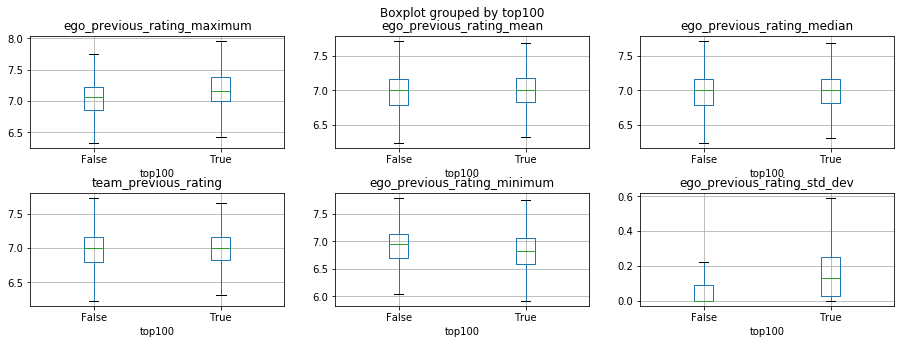

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

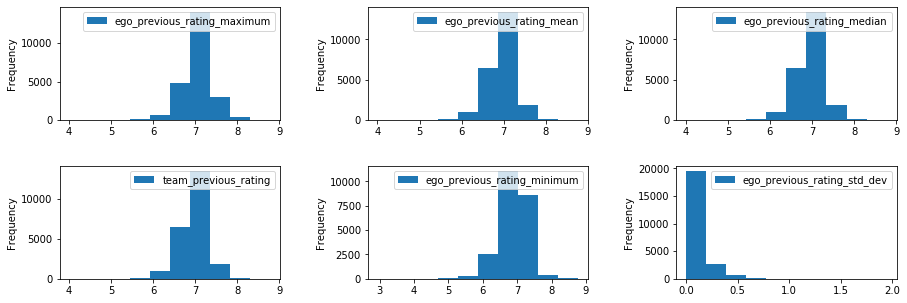

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [14]:
dfx[f].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev,ypct,year
ego_previous_rating_maximum,1.000000,0.897091,0.876709,0.877865,0.665772,0.282973,0.028274,-0.114561
ego_previous_rating_mean,0.897091,1.000000,0.989470,0.973964,0.916950,-0.151542,-0.108433,-0.139863
ego_previous_rating_median,0.876709,0.989470,1.000000,0.964455,0.893767,-0.145314,-0.106704,-0.136681
team_previous_rating,0.877865,0.973964,0.964455,1.000000,0.888330,-0.135452,-0.105941,-0.145711
ego_previous_rating_minimum,0.665772,0.916950,0.893767,0.888330,1.000000,-0.517074,-0.211683,-0.140210
ego_previous_rating_std_dev,0.282973,-0.151542,-0.145314,-0.135452,-0.517074,1.000000,0.296552,0.043326
ypct,0.028274,-0.108433,-0.106704,-0.105941,-0.211683,0.296552,1.000000,0.121060
year,-0.114561,-0.139863,-0.136681,-0.145711,-0.140210,0.043326,0.121060,1.000000


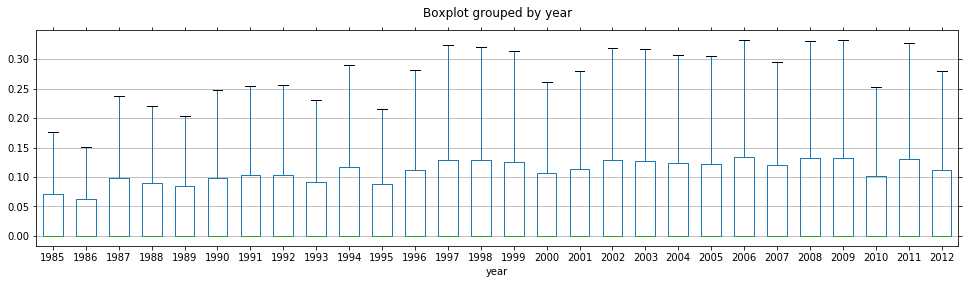

In [15]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), showfliers=False, widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

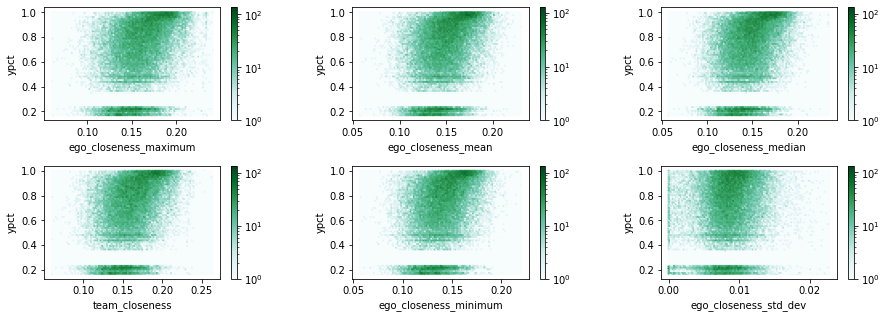

In [16]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

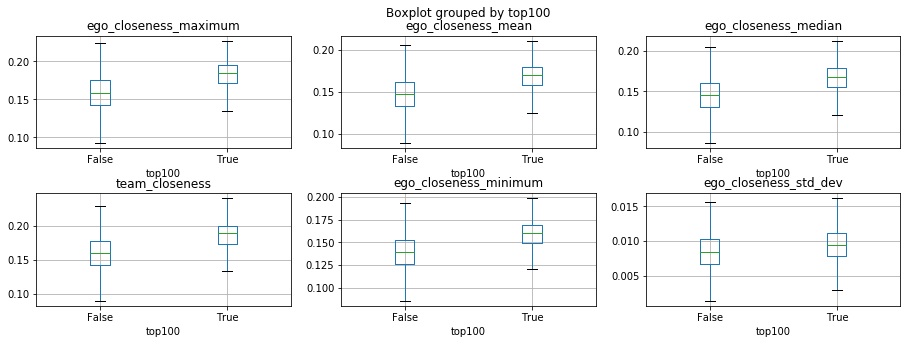

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

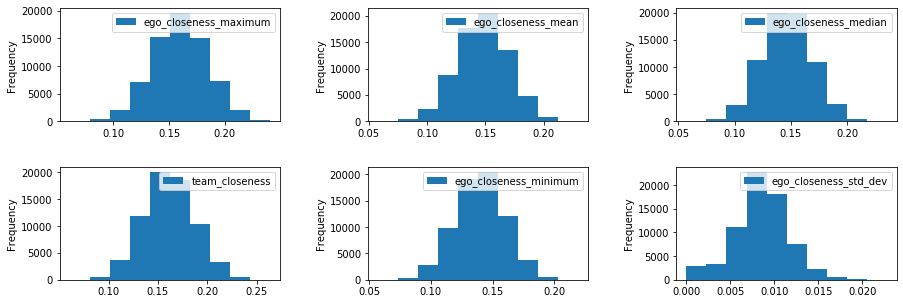

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [19]:
dfx[f].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev,ypct,year
ego_closeness_maximum,1.000000,0.980873,0.946621,0.996044,0.968822,0.631413,0.349108,-0.128918
ego_closeness_mean,0.980873,1.000000,0.987456,0.984925,0.989482,0.521871,0.333512,-0.149391
ego_closeness_median,0.946621,0.987456,1.000000,0.955388,0.968621,0.467783,0.317292,-0.155375
team_closeness,0.996044,0.984925,0.955388,1.000000,0.974332,0.593751,0.364607,-0.124544
ego_closeness_minimum,0.968822,0.989482,0.968621,0.974332,1.000000,0.436856,0.338681,-0.146518
ego_closeness_std_dev,0.631413,0.521871,0.467783,0.593751,0.436856,1.000000,0.146479,-0.051507
ypct,0.349108,0.333512,0.317292,0.364607,0.338681,0.146479,1.000000,0.121060
year,-0.128918,-0.149391,-0.155375,-0.124544,-0.146518,-0.051507,0.121060,1.000000


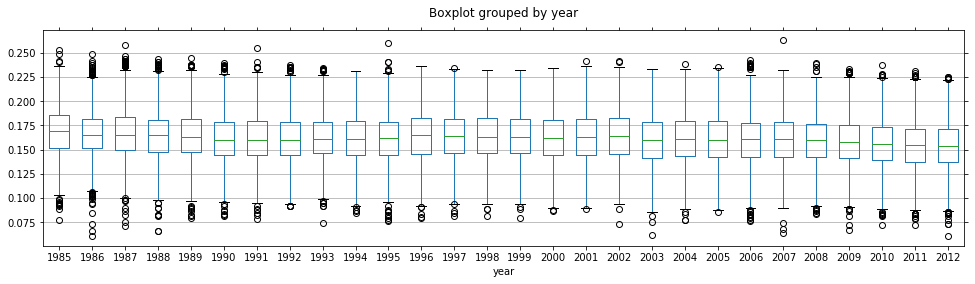

In [20]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

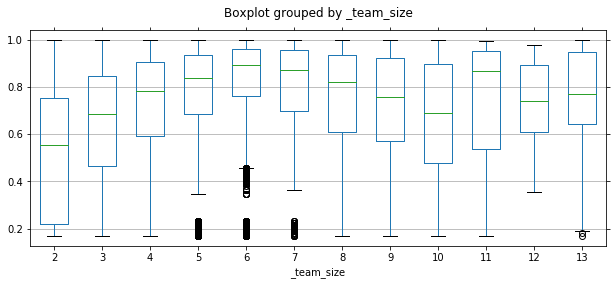

In [21]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

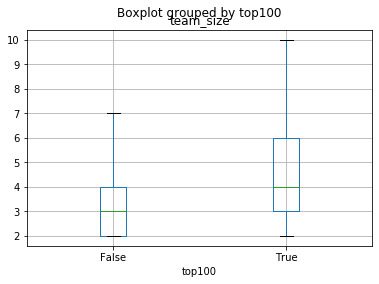

In [22]:
_ = df.boxplot('team_size', by='top100', showfliers=False)

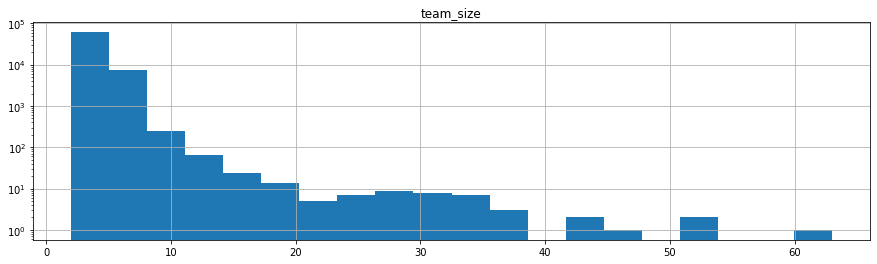

In [23]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

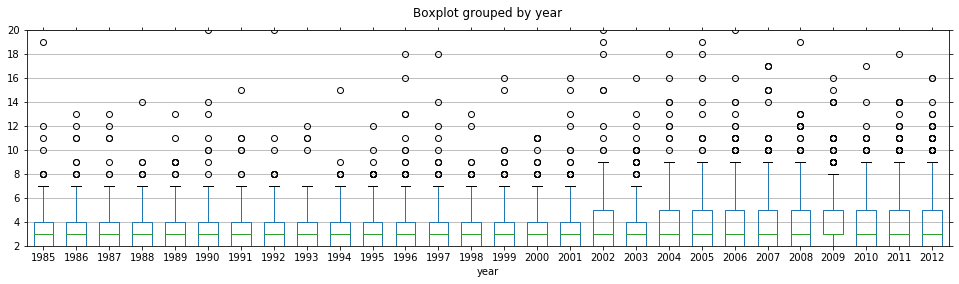

In [24]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_size', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

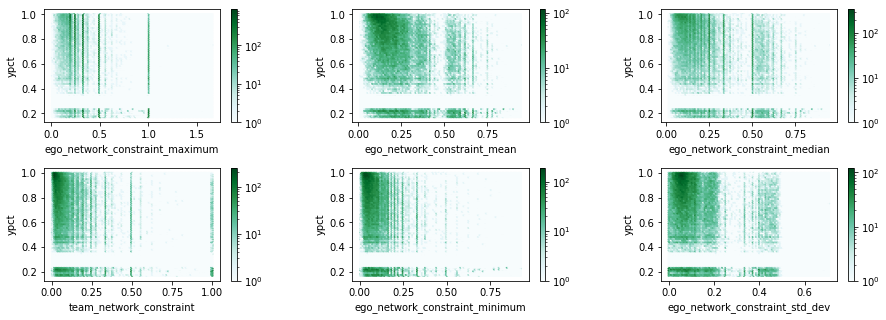

In [25]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

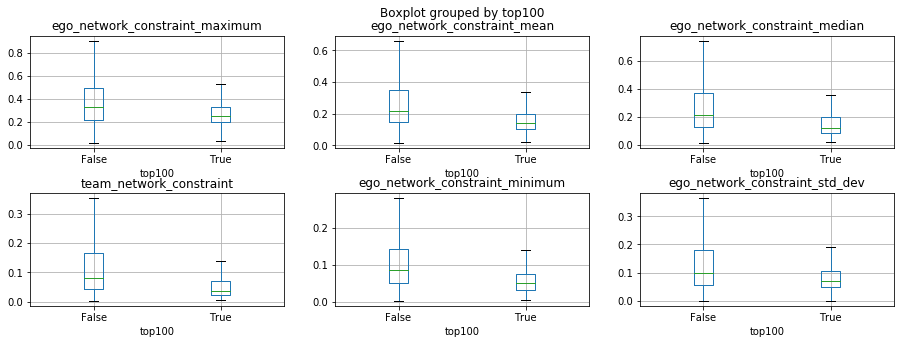

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

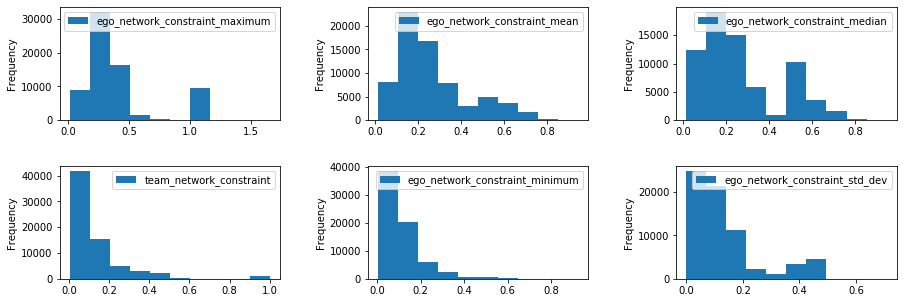

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [28]:
dfx[f].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev,ypct,year
ego_network_constraint_maximum,1.000000,0.948622,0.866119,0.414880,0.471104,0.945567,-0.298421,0.013469
ego_network_constraint_mean,0.948622,1.000000,0.962728,0.609545,0.679079,0.816708,-0.335543,0.020835
ego_network_constraint_median,0.866119,0.962728,1.000000,0.594091,0.634818,0.744098,-0.322386,0.031909
team_network_constraint,0.414880,0.609545,0.594091,1.000000,0.858177,0.153720,-0.232094,0.029338
ego_network_constraint_minimum,0.471104,0.679079,0.634818,0.858177,1.000000,0.168235,-0.283554,0.001635
ego_network_constraint_std_dev,0.945567,0.816708,0.744098,0.153720,0.168235,1.000000,-0.239868,0.010614
ypct,-0.298421,-0.335543,-0.322386,-0.232094,-0.283554,-0.239868,1.000000,0.121060
year,0.013469,0.020835,0.031909,0.029338,0.001635,0.010614,0.121060,1.000000


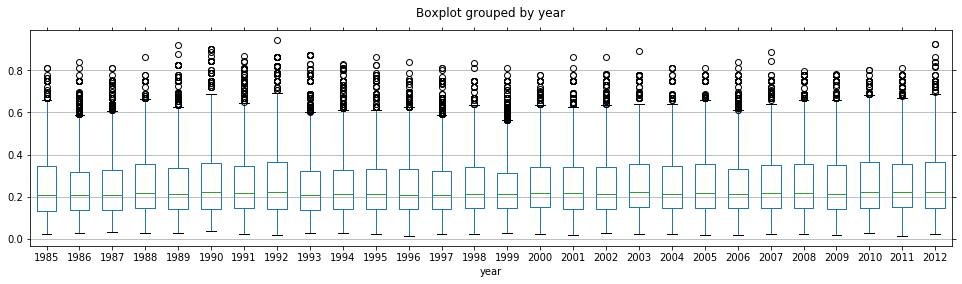

In [29]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_network_constraint_mean', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

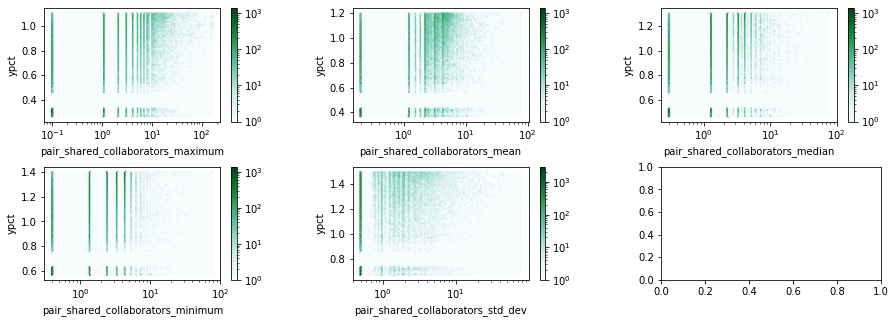

In [30]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

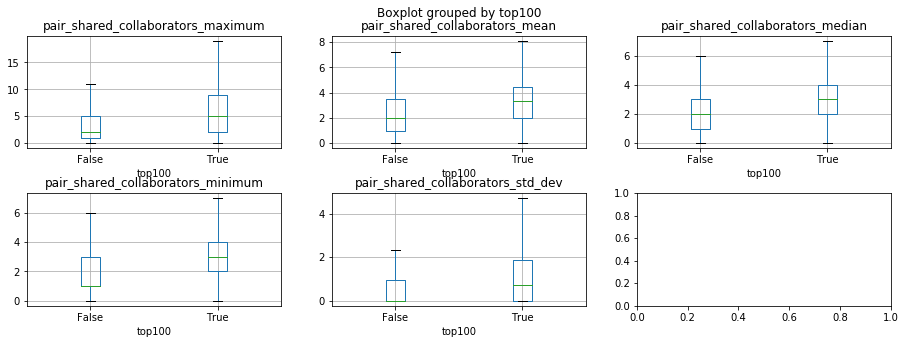

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

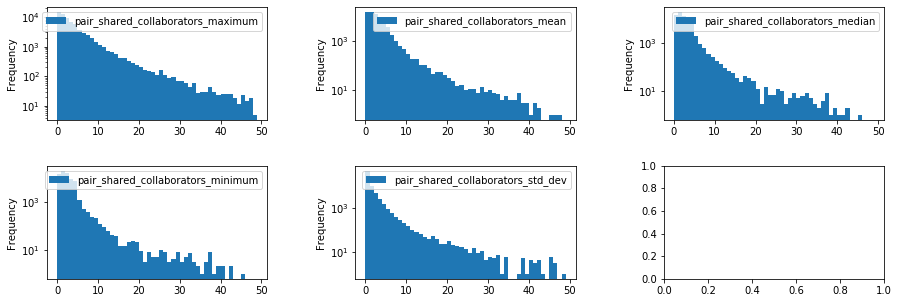

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [33]:
dfx[f].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev,ypct,year
pair_shared_collaborators_maximum,1.000000,0.791460,0.532157,0.448090,0.929929,0.195768,-0.004914
pair_shared_collaborators_mean,0.791460,1.000000,0.900484,0.838694,0.643075,0.207534,-0.009603
pair_shared_collaborators_median,0.532157,0.900484,1.000000,0.942499,0.287630,0.183511,-0.005055
pair_shared_collaborators_minimum,0.448090,0.838694,0.942499,1.000000,0.171321,0.190476,0.019154
pair_shared_collaborators_std_dev,0.929929,0.643075,0.287630,0.171321,1.000000,0.147685,-0.019744
ypct,0.195768,0.207534,0.183511,0.190476,0.147685,1.000000,0.121060
year,-0.004914,-0.009603,-0.005055,0.019154,-0.019744,0.121060,1.000000


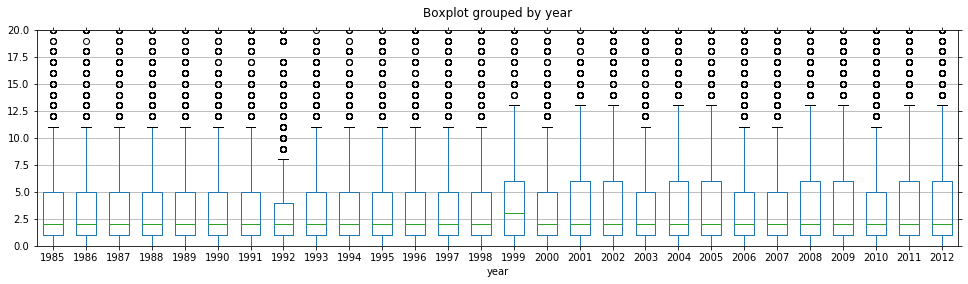

In [34]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_shared_collaborators_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

## Neighbour Overlap in Pairs

Scatter plot of `pair_neighbour_overlap` features and `ypct`:

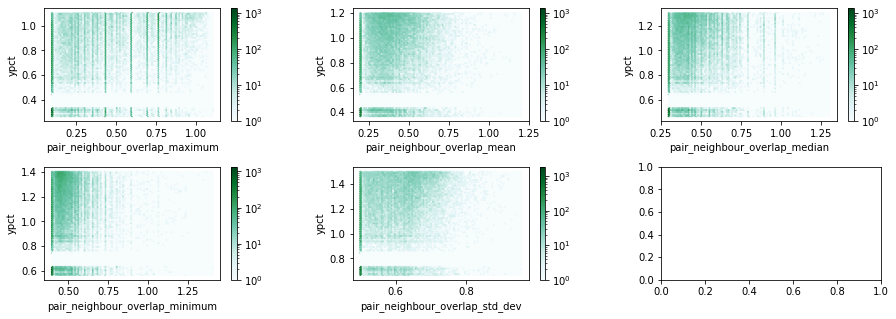

In [35]:
f = ['pair_neighbour_overlap_maximum',
'pair_neighbour_overlap_mean',
'pair_neighbour_overlap_median',
'pair_neighbour_overlap_minimum',
'pair_neighbour_overlap_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

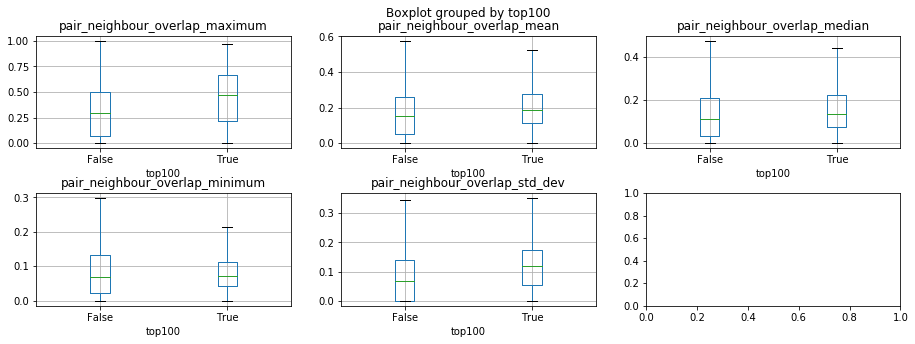

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

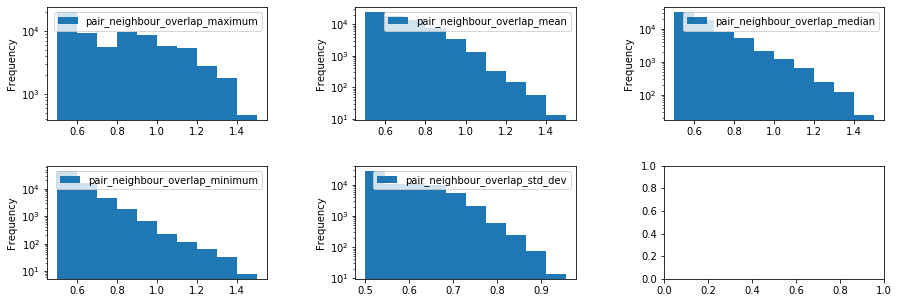

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [38]:
dfx[f].corr()

,pair_neighbour_overlap_maximum,pair_neighbour_overlap_mean,pair_neighbour_overlap_median,pair_neighbour_overlap_minimum,pair_neighbour_overlap_std_dev,ypct,year
pair_neighbour_overlap_maximum,1.000000,0.862062,0.713356,0.573890,0.894095,0.300107,0.136031
pair_neighbour_overlap_mean,0.862062,1.000000,0.943233,0.864710,0.650985,0.189461,0.120744
pair_neighbour_overlap_median,0.713356,0.943233,1.000000,0.858894,0.467374,0.142725,0.100061
pair_neighbour_overlap_minimum,0.573890,0.864710,0.858894,1.000000,0.231801,0.056137,0.077257
pair_neighbour_overlap_std_dev,0.894095,0.650985,0.467374,0.231801,1.000000,0.288347,0.122813
ypct,0.300107,0.189461,0.142725,0.056137,0.288347,1.000000,0.121060
year,0.136031,0.120744,0.100061,0.077257,0.122813,0.121060,1.000000


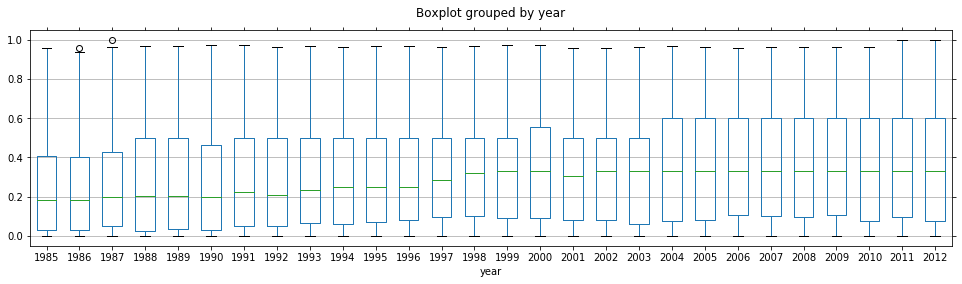

In [39]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_neighbour_overlap_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Degree

Scatter plot of `degree` features and `ypct`:

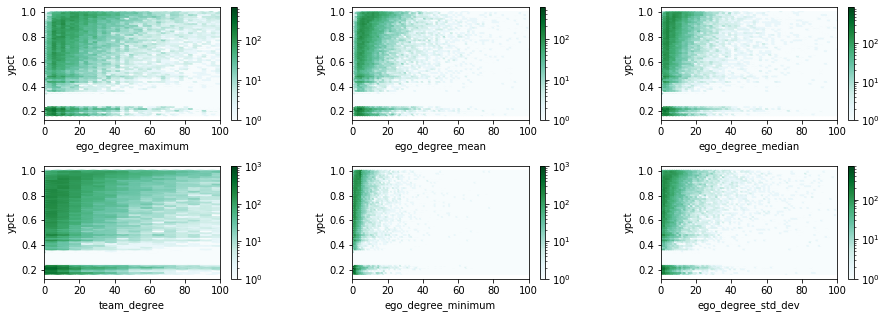

In [40]:
f = ['ego_degree_maximum',
'ego_degree_mean',
'ego_degree_median',
'team_degree',
'ego_degree_minimum',
'ego_degree_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

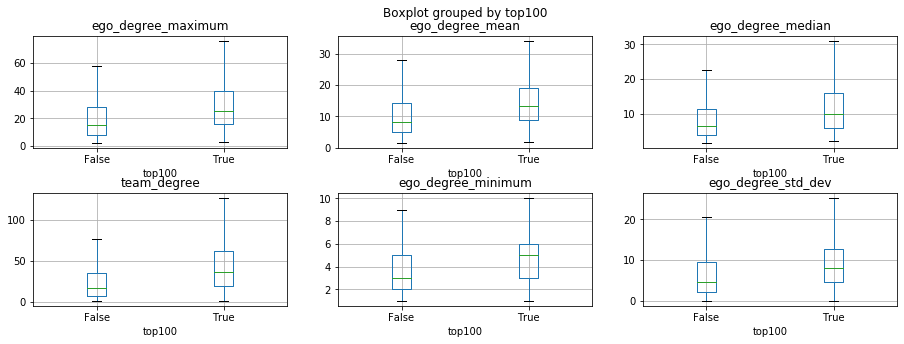

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

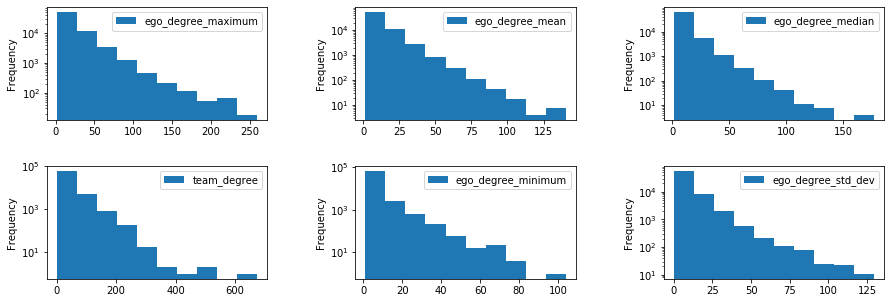

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [43]:
dfx[f].corr()

,ego_degree_maximum,ego_degree_mean,ego_degree_median,team_degree,ego_degree_minimum,ego_degree_std_dev,ypct,year
ego_degree_maximum,1.000000,0.909335,0.638293,0.939711,0.345125,0.967577,0.172347,-0.050131
ego_degree_mean,0.909335,1.000000,0.877102,0.915832,0.585921,0.844686,0.147652,-0.090715
ego_degree_median,0.638293,0.877102,1.000000,0.718534,0.612863,0.559379,0.101056,-0.105057
team_degree,0.939711,0.915832,0.718534,1.000000,0.441576,0.862711,0.213544,-0.054485
ego_degree_minimum,0.345125,0.585921,0.612863,0.441576,1.000000,0.149231,0.090551,-0.083695
ego_degree_std_dev,0.967577,0.844686,0.559379,0.862711,0.149231,1.000000,0.128551,-0.045780
ypct,0.172347,0.147652,0.101056,0.213544,0.090551,0.128551,1.000000,0.121060
year,-0.050131,-0.090715,-0.105057,-0.054485,-0.083695,-0.045780,0.121060,1.000000


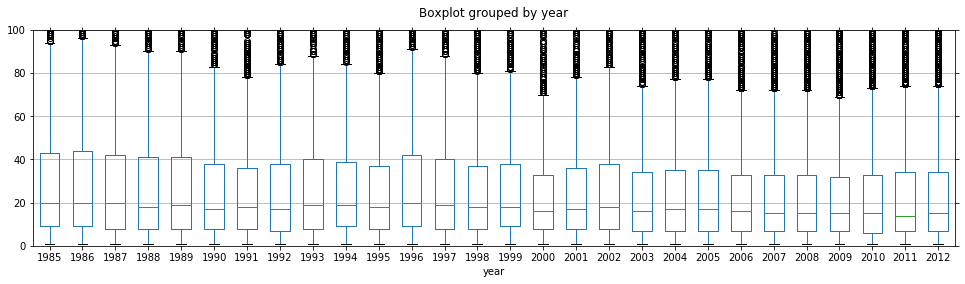

In [44]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_degree', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 100)
ax.xaxis.grid(False)

## Past Experience

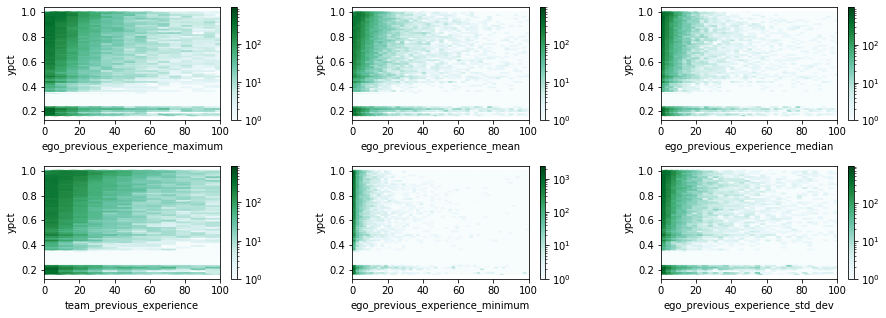

In [45]:
f = ['ego_previous_experience_maximum',
'ego_previous_experience_mean',
'ego_previous_experience_median',
'team_previous_experience',
'ego_previous_experience_minimum',
'ego_previous_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

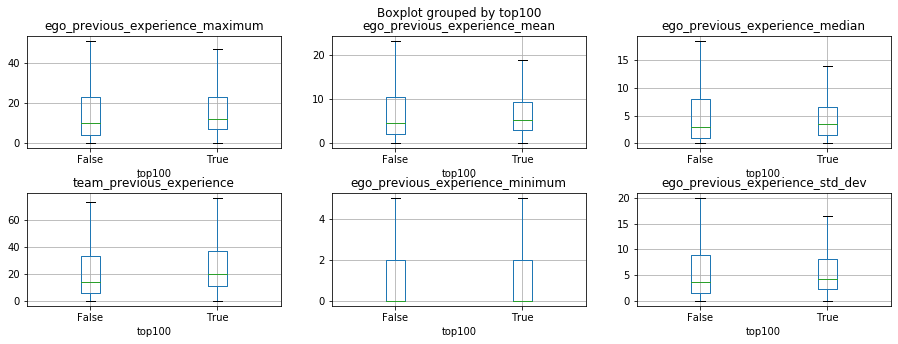

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

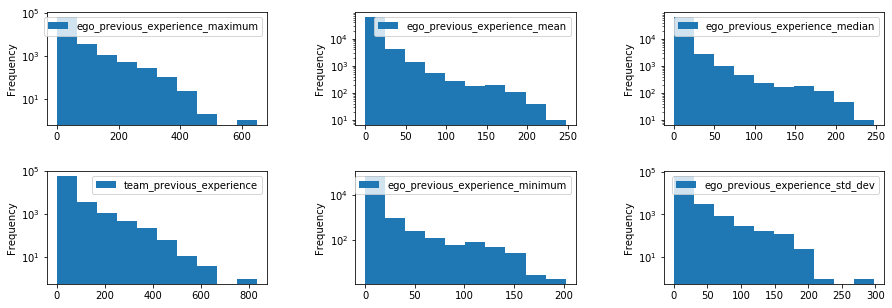

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [48]:
dfx[f].corr()

,ego_previous_experience_maximum,ego_previous_experience_mean,ego_previous_experience_median,team_previous_experience,ego_previous_experience_minimum,ego_previous_experience_std_dev,ypct,year
ego_previous_experience_maximum,1.000000,0.930569,0.769962,0.954232,0.440082,0.973422,-0.125323,-0.170316
ego_previous_experience_mean,0.930569,1.000000,0.936846,0.912372,0.669876,0.867677,-0.174041,-0.182446
ego_previous_experience_median,0.769962,0.936846,1.000000,0.781122,0.704208,0.699382,-0.185747,-0.169785
team_previous_experience,0.954232,0.912372,0.781122,1.000000,0.486127,0.894465,-0.084025,-0.180801
ego_previous_experience_minimum,0.440082,0.669876,0.704208,0.486127,1.000000,0.256419,-0.140982,-0.115489
ego_previous_experience_std_dev,0.973422,0.867677,0.699382,0.894465,0.256419,1.000000,-0.128519,-0.157520
ypct,-0.125323,-0.174041,-0.185747,-0.084025,-0.140982,-0.128519,1.000000,0.121060
year,-0.170316,-0.182446,-0.169785,-0.180801,-0.115489,-0.157520,0.121060,1.000000


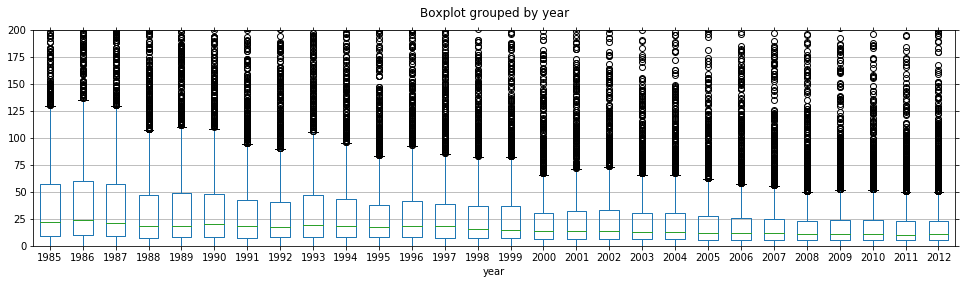

In [49]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_previous_experience', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 200)
ax.xaxis.grid(False)

## Betweenness 
`ego_betweenness_maximum`

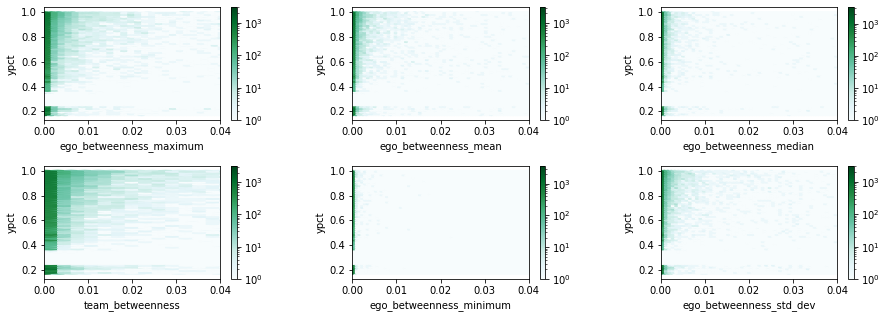

In [50]:
f = ['ego_betweenness_maximum',
'ego_betweenness_mean',
'ego_betweenness_median',
'team_betweenness',
'ego_betweenness_minimum',
'ego_betweenness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 0.04)

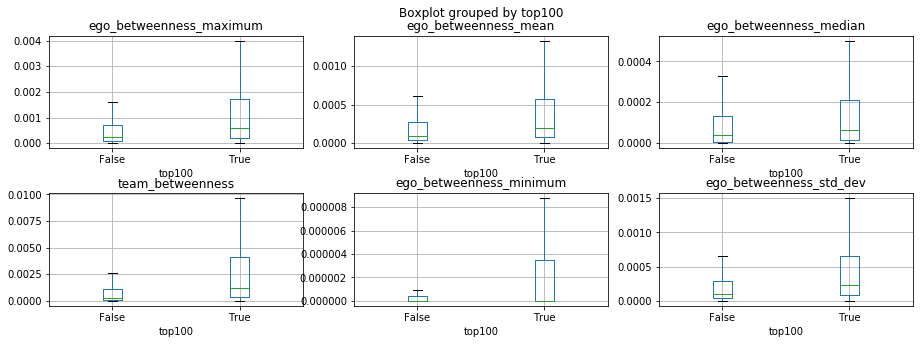

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

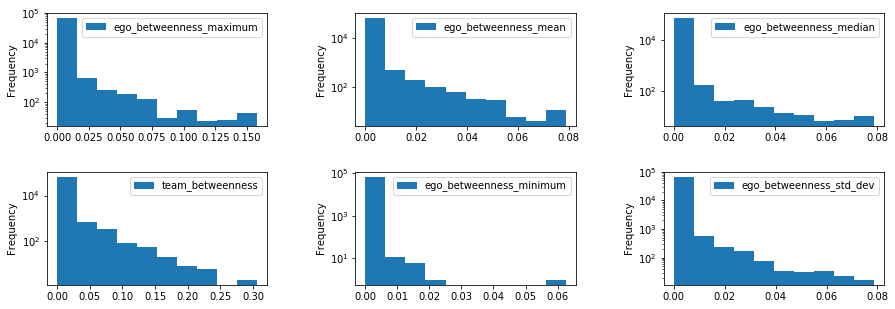

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [53]:
dfx[f].corr()

,ego_betweenness_maximum,ego_betweenness_mean,ego_betweenness_median,team_betweenness,ego_betweenness_minimum,ego_betweenness_std_dev,ypct,year
ego_betweenness_maximum,1.000000,0.934635,0.503575,0.591401,0.117917,0.992855,0.054137,-0.025574
ego_betweenness_mean,0.934635,1.000000,0.740259,0.538008,0.230556,0.954619,0.033608,-0.033872
ego_betweenness_median,0.503575,0.740259,1.000000,0.276561,0.302366,0.538980,-0.001989,-0.033368
team_betweenness,0.591401,0.538008,0.276561,1.000000,0.063404,0.578254,0.097713,-0.042816
ego_betweenness_minimum,0.117917,0.230556,0.302366,0.063404,1.000000,0.081358,0.003725,-0.029419
ego_betweenness_std_dev,0.992855,0.954619,0.538980,0.578254,0.081358,1.000000,0.044679,-0.025549
ypct,0.054137,0.033608,-0.001989,0.097713,0.003725,0.044679,1.000000,0.121060
year,-0.025574,-0.033872,-0.033368,-0.042816,-0.029419,-0.025549,0.121060,1.000000


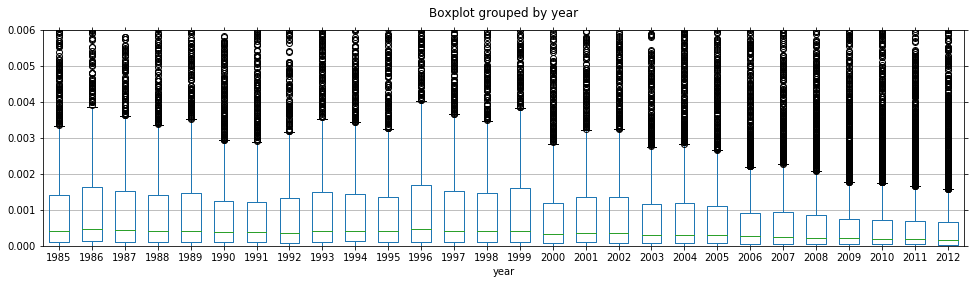

In [54]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_betweenness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Pair Past Experience

`pair_past_experience_mean`

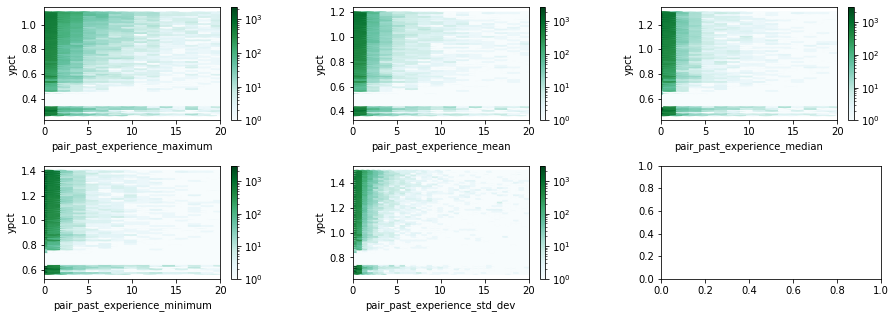

In [55]:
f = ['pair_past_experience_maximum',
'pair_past_experience_mean',
'pair_past_experience_median',
'pair_past_experience_minimum',
'pair_past_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 20)

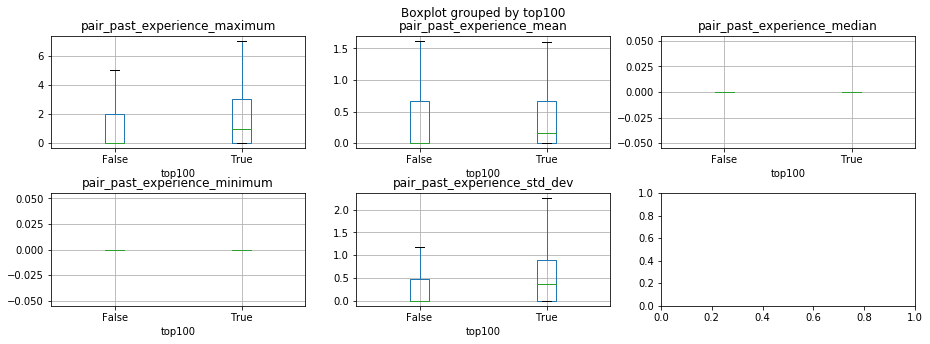

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

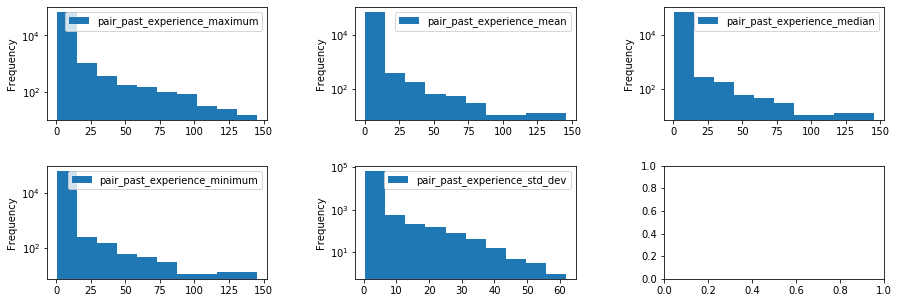

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [58]:
dfx[f].corr()

,pair_past_experience_maximum,pair_past_experience_mean,pair_past_experience_median,pair_past_experience_minimum,pair_past_experience_std_dev,ypct,year
pair_past_experience_maximum,1.000000,0.775164,0.641456,0.605548,0.783922,-0.019471,-0.061134
pair_past_experience_mean,0.775164,1.000000,0.972105,0.958764,0.286765,-0.120370,-0.057212
pair_past_experience_median,0.641456,0.972105,1.000000,0.988295,0.076711,-0.133085,-0.047987
pair_past_experience_minimum,0.605548,0.958764,0.988295,1.000000,0.020246,-0.134629,-0.041334
pair_past_experience_std_dev,0.783922,0.286765,0.076711,0.020246,1.000000,0.056319,-0.053140
ypct,-0.019471,-0.120370,-0.133085,-0.134629,0.056319,1.000000,0.121060
year,-0.061134,-0.057212,-0.047987,-0.041334,-0.053140,0.121060,1.000000


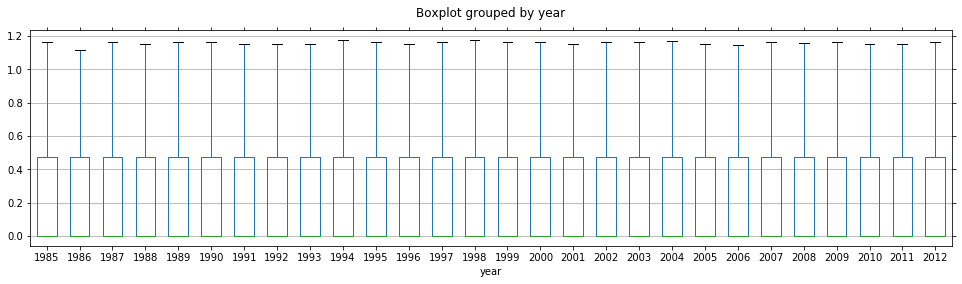

In [59]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_past_experience_std_dev', by='year', figsize=(16,4), widths=0.6, showfliers=False)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Clustering
`ego_clustering_maximum`

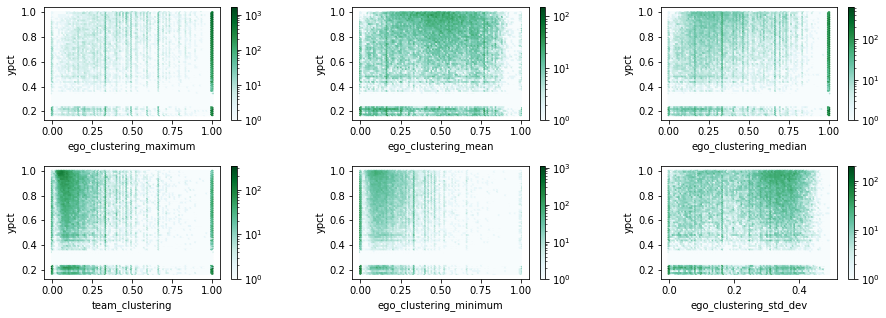

In [60]:
f = ['ego_clustering_maximum',
'ego_clustering_mean',
'ego_clustering_median',
'team_clustering',
'ego_clustering_minimum',
'ego_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

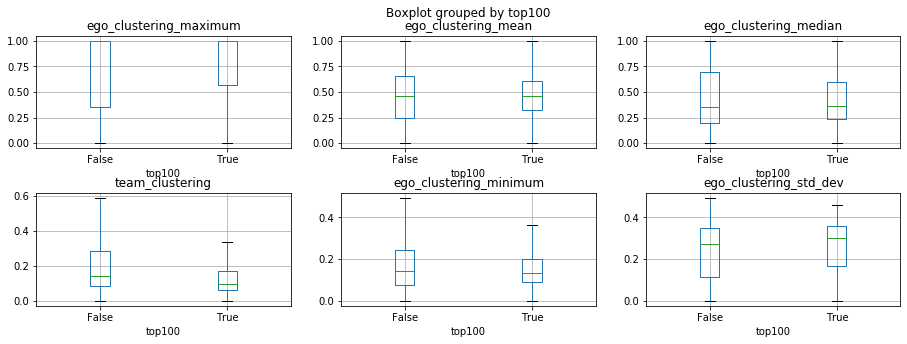

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

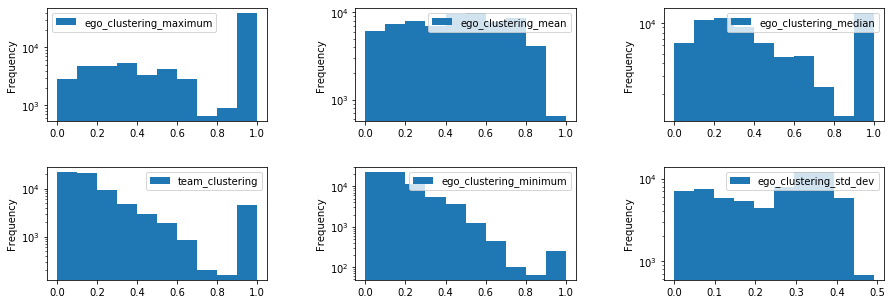

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [63]:
dfx[f].corr()

,ego_clustering_maximum,ego_clustering_mean,ego_clustering_median,team_clustering,ego_clustering_minimum,ego_clustering_std_dev,ypct,year
ego_clustering_maximum,1.000000,0.877619,0.691667,0.103757,0.465065,0.886271,0.218462,0.123662
ego_clustering_mean,0.877619,1.000000,0.925862,0.278180,0.684830,0.667969,0.147338,0.138566
ego_clustering_median,0.691667,0.925862,1.000000,0.305797,0.572400,0.529846,0.085366,0.126965
team_clustering,0.103757,0.278180,0.305797,1.000000,0.374148,-0.002072,-0.123726,0.103221
ego_clustering_minimum,0.465065,0.684830,0.572400,0.374148,1.000000,0.049515,0.060024,0.100619
ego_clustering_std_dev,0.886271,0.667969,0.529846,-0.002072,0.049515,1.000000,0.168454,0.083989
ypct,0.218462,0.147338,0.085366,-0.123726,0.060024,0.168454,1.000000,0.121060
year,0.123662,0.138566,0.126965,0.103221,0.100619,0.083989,0.121060,1.000000


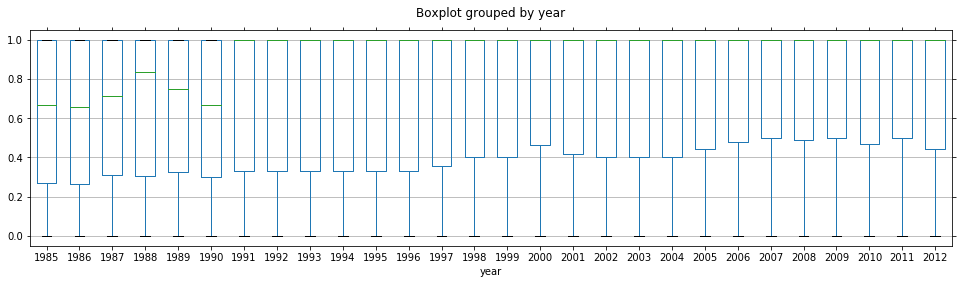

In [64]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_clustering_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
#ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Square Clustering
`ego_square_clustering_maximum`

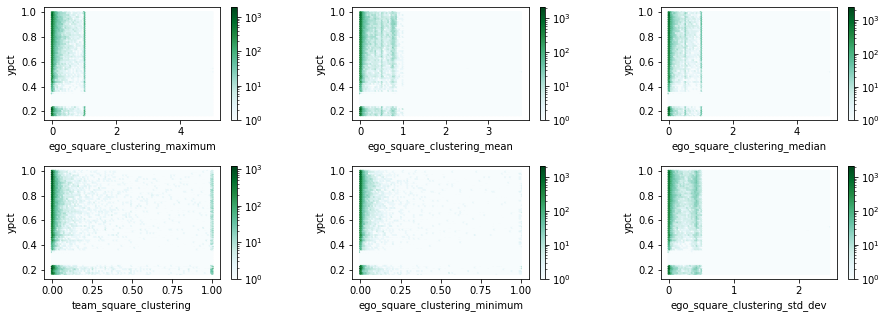

In [65]:
f = ['ego_square_clustering_maximum',
'ego_square_clustering_mean',
'ego_square_clustering_median',
'team_square_clustering',
'ego_square_clustering_minimum',
'ego_square_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

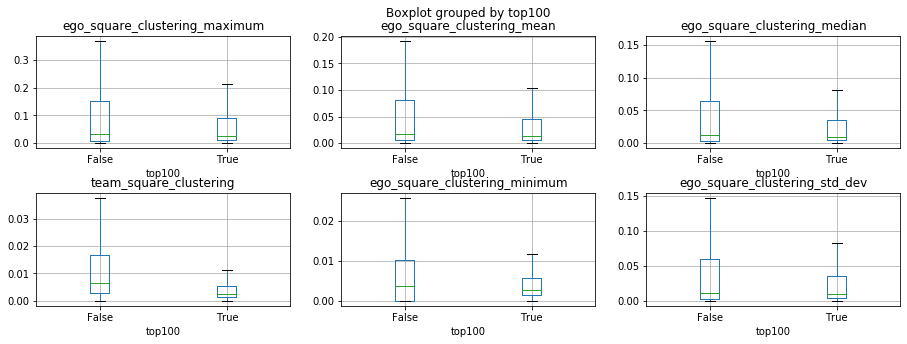

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

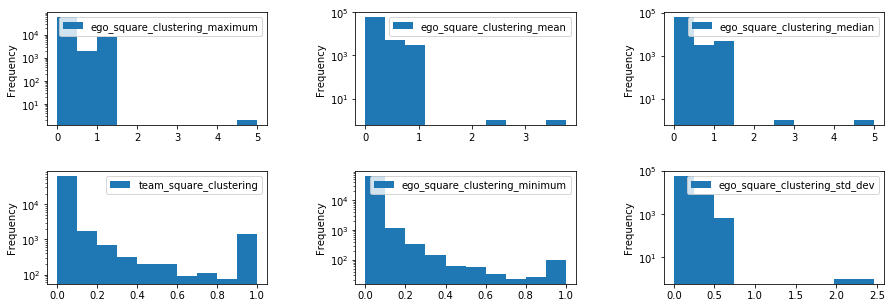

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [68]:
dfx[f].corr()

,ego_square_clustering_maximum,ego_square_clustering_mean,ego_square_clustering_median,team_square_clustering,ego_square_clustering_minimum,ego_square_clustering_std_dev,ypct,year
ego_square_clustering_maximum,1.000000,0.959274,0.882306,0.334985,0.384569,0.977922,0.011926,0.114424
ego_square_clustering_mean,0.959274,1.000000,0.970412,0.311521,0.445539,0.908776,0.011201,0.106585
ego_square_clustering_median,0.882306,0.970412,1.000000,0.263799,0.375312,0.837386,0.013983,0.093928
team_square_clustering,0.334985,0.311521,0.263799,1.000000,0.267436,0.325366,-0.079065,0.077721
ego_square_clustering_minimum,0.384569,0.445539,0.375312,0.267436,1.000000,0.215834,-0.018595,0.064568
ego_square_clustering_std_dev,0.977922,0.908776,0.837386,0.325366,0.215834,1.000000,0.008641,0.106847
ypct,0.011926,0.011201,0.013983,-0.079065,-0.018595,0.008641,1.000000,0.121060
year,0.114424,0.106585,0.093928,0.077721,0.064568,0.106847,0.121060,1.000000


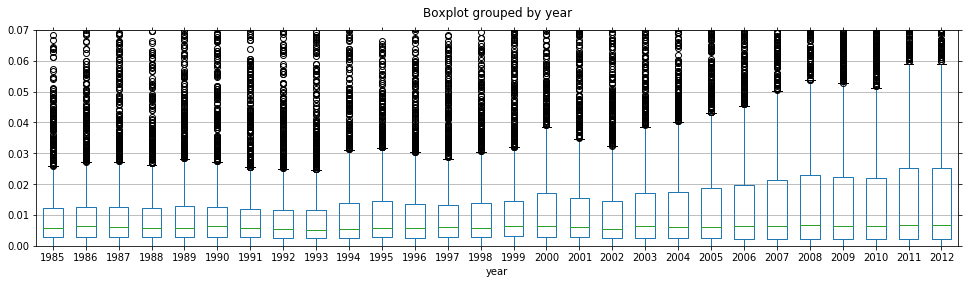

In [69]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_square_clustering', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.07)
ax.xaxis.grid(False)

## Year

Whach out for year of release. Since we have more movies the latter years, this happens:

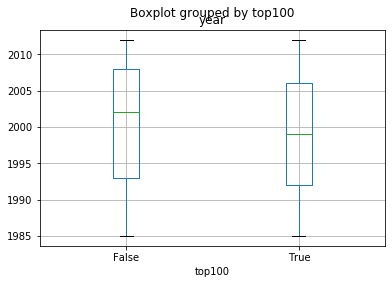

In [70]:
_ = df.boxplot('year', by='top100', showfliers=False)